this is my effort to try exponentially weighted linear regression model on time series data, eg. bitcoin real-time data

http://stanford.edu/class/msande448/2016/final/group5.pdf
exploit correlation

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.640.8381&rep=rep1&type=pdf


implementation:
https://www.geeksforgeeks.org/ml-locally-weighted-linear-regression/


### Machine Learning: Linear Regression with one variable

Nothing is easier than a linear regression with only one variable. But the simplest model can be very helpful to understand what is going on during the model training process. This notebook was made while I taking Andrew Ng's machine learning course: [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [3]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np
import pandas as pd
# Plotting library
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to plot 3-D surfaces

# library written for this exercise providing additional functions for assignment submission, and others
import utils 
# define the submission/grader object for this exercise
grader = utils.Grader()

%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Data
The data has two columns. The first column is the population of a city (in 10,000s) and the second column is the profit of a food truck in that city (in $10,000s). A negative value for profit indicates a loss. We would like to build a linear regression model to predict the profit based on population. 

The model is simply as follow: $\theta_0$ is the intercept term and $\theta_1$ is the slope. Input x is the popuation and output $ h_\theta(x)$ is the prediction.

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$


In [50]:
f = 'price.txt'
data = pd.read_csv(f, index_col='timestamp')
# should be cautious when doing backward fill since the future price is unknown
data = data.bfill()
data.head()
cols = data.columns.tolist()
col2 = cols.remove('XRPUSDT')
col2
cols
X = np.array(data[cols])
X[:2]
y = np.array(data['XRPUSDT'])
y[:3]
m, n = X.shape
m, n

,BTCUSD,DOGEUSD,LTCUSD,DASHUSD,ETHUSD,ZECUSD,ETCUSD,EOSUSD,NEOUSD,BTGUSD,XRPUSDT,TRXUSD
timestamp,,,,,,,,,,,,
2019-05-18 19:35:00,7265.07,0.002927,87.2370,139.5874,236.310,72.4322,7.27010,5.89108,10.87930,20.80118,0.373746,0.026526
2019-05-18 19:36:00,7270.31,0.002928,87.2272,139.5874,236.469,72.4322,7.26339,5.89272,10.88388,20.80118,0.373880,0.026564
2019-05-18 19:37:00,7275.05,0.002925,87.2639,139.5881,236.641,72.4322,7.24586,5.89160,10.87263,20.80118,0.373965,0.026547
2019-05-18 19:38:00,7274.67,0.002927,87.2510,139.5881,236.452,72.4322,7.24123,5.89294,10.88407,20.80118,0.373799,0.026541
2019-05-18 19:39:00,7274.15,0.002924,87.2515,139.5462,236.169,72.4322,7.24480,5.89044,10.87674,20.80118,0.373651,0.026549


['BTCUSD',
 'DOGEUSD',
 'LTCUSD',
 'DASHUSD',
 'ETHUSD',
 'ZECUSD',
 'ETCUSD',
 'EOSUSD',
 'NEOUSD',
 'BTGUSD',
 'TRXUSD']

array([[7.265070e+03, 2.926920e-03, 8.723700e+01, 1.395874e+02,
        2.363100e+02, 7.243220e+01, 7.270100e+00, 5.891080e+00,
        1.087930e+01, 2.080118e+01, 2.652600e-02],
       [7.270310e+03, 2.927810e-03, 8.722720e+01, 1.395874e+02,
        2.364690e+02, 7.243220e+01, 7.263390e+00, 5.892720e+00,
        1.088388e+01, 2.080118e+01, 2.656430e-02]])

array([0.373746, 0.37388 , 0.373965])

(400, 11)

#### Add in a column of ones to include intercept term as a feature

we add another dimension to our data to accommodate the $\theta_0$ intercept term. We can use either np.concatenate or np.stack.

In [24]:
X.shape
X[:2]

(400, 11)

array([[7.265070e+03, 2.926920e-03, 8.723700e+01, 1.395874e+02,
        2.363100e+02, 7.243220e+01, 7.270100e+00, 5.891080e+00,
        1.087930e+01, 2.080118e+01, 2.652600e-02],
       [7.270310e+03, 2.927810e-03, 8.722720e+01, 1.395874e+02,
        2.364690e+02, 7.243220e+01, 7.263390e+00, 5.892720e+00,
        1.088388e+01, 2.080118e+01, 2.656430e-02]])

In [37]:
np.ones(m)[:,None].shape
X.shape
a = np.ones(m)[:, None]
np.concatenate([a, X], axis=1)

(400, 1)

(400, 11)

array([[1.000000e+00, 7.265070e+03, 2.926920e-03, ..., 1.087930e+01,
        2.080118e+01, 2.652600e-02],
       [1.000000e+00, 7.270310e+03, 2.927810e-03, ..., 1.088388e+01,
        2.080118e+01, 2.656430e-02],
       [1.000000e+00, 7.275050e+03, 2.924930e-03, ..., 1.087263e+01,
        2.080118e+01, 2.654660e-02],
       ...,
       [1.000000e+00, 7.733300e+03, 3.061780e-03, ..., 1.123999e+01,
        2.123406e+01, 2.754730e-02],
       [1.000000e+00, 7.707800e+03, 3.061780e-03, ..., 1.121799e+01,
        2.124287e+01, 2.747270e-02],
       [1.000000e+00, 7.738980e+03, 3.061780e-03, ..., 1.123242e+01,
        2.123991e+01, 2.750560e-02]])

In [41]:
# Add a column of ones to X. The numpy function stack joins arrays along a given axis. 
# The first axis (axis=0) refers to rows (training examples) 
# and second axis (axis=1) refers to columns (features).
X = np.concatenate([np.ones(m)[:,None], X], axis=1)

In [42]:
X[:2]
X.shape

array([[1.000000e+00, 7.265070e+03, 2.926920e-03, 8.723700e+01,
        1.395874e+02, 2.363100e+02, 7.243220e+01, 7.270100e+00,
        5.891080e+00, 1.087930e+01, 2.080118e+01, 2.652600e-02],
       [1.000000e+00, 7.270310e+03, 2.927810e-03, 8.722720e+01,
        1.395874e+02, 2.364690e+02, 7.243220e+01, 7.263390e+00,
        5.892720e+00, 1.088388e+01, 2.080118e+01, 2.656430e-02]])

(400, 12)

### weights exponentially decrease as time goes into the past

In [48]:
alpha = 0.9
ts = 4
# time_step = 1
ws = [alpha ** (ts - t) for t in np.arange(ts, 0, -1)]
ws

[1.0, 0.9, 0.81, 0.7290000000000001]

In [54]:
W = np.zeros(m*m).reshape(m, m)
W

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:

for i in range(m):
    W[i, i] = alpha ** (i+1)

In [68]:
W.shape
X.shape

(400, 400)

(400, 11)

In [69]:
W @ X

array([[6.53856300e+03, 2.63422800e-03, 7.85133000e+01, ...,
        9.79137000e+00, 1.87210620e+01, 2.38734000e-02],
       [5.88895110e+03, 2.37152610e-03, 7.06540320e+01, ...,
        8.81594280e+00, 1.68489558e+01, 2.15170830e-02],
       [5.30351145e+03, 2.13227397e-03, 6.36153831e+01, ...,
        7.92614727e+00, 1.51640602e+01, 1.93524714e-02],
       ...,
       [4.75207860e-15, 1.88145025e-21, 5.55606002e-17, ...,
        6.90692407e-18, 1.30482358e-17, 1.69276938e-20],
       [4.26276806e-15, 1.69330522e-21, 4.98889536e-17, ...,
        6.20406465e-18, 1.17482846e-17, 1.51936672e-20],
       [3.85201083e-15, 1.52397470e-21, 4.50013486e-17, ...,
        5.59084059e-18, 1.05719828e-17, 1.36906762e-20]])

####  Computing the cost $J(\theta)$
The objective of linear regression is to minimize the cost function $J(\theta)$. The cost function is just half of the average squared error for all training examples. 
$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$



In [10]:
def computeCost(X, y, theta):      
    # number of training examples
    m = y.size  
    J = 0
    J = (np.sum((X @ theta - y)**2))/2/m
    return J

#### Different theta gives different cost for the data

Once you have completed the function, the next step will run `computeCost` two times using two different initializations of $\theta$. You will see the cost printed to the screen.

In [11]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('With theta = [0, 0] \nCost computed = %.2f' % J)

# further testing of the cost function
J = computeCost(X, y, theta=np.array([-1, 2]))
print('With theta = [-1, 2]\nCost computed = %.2f' % J)

With theta = [0, 0] 
Cost computed = 32.07
With theta = [-1, 2]
Cost computed = 54.24


#### Implement gradient descent algorithm

Implements gradient descent to minimize cost function by updating Theta for all training examples or a mini batch of them. We update $\theta_j$ values through many iterations in order to minimize cost $J(\theta)$. Low cost means the model is accurate in predicting the profit given the number of population in a city. Here, we apply batch gradient descent. For each iteration, we update the $\theta$ once. With each step of gradient descent, your parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost J($\theta$). Note that the gradient is the partial derivatives of cost function in term of theta. If we plot the cost, we should see it decrease over iterations.

$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{simultaneously update } \theta_j \text{ for all } j$$


 

In [99]:
def gradientDescent(X, y, theta, alpha, num_iters):   
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    J_history = [] 
    theta_history = []
    for i in range(num_iters):        
        # must update thetas simultaneously
        theta_tmp = []    
        for j in range(len(theta)): # partial derivative 
            gradient = (alpha/m) * np.sum(((X @ theta) - y) * X[:,j])
            new_theta = theta[j] - gradient
            theta_tmp.append(new_theta)        
        theta = theta_tmp
        theta_history.append(theta_tmp)
        J_history.append(computeCost(X, y, theta))
    # add in the intial theta and cost
    theta_history = [init_theta.tolist()] + theta_history
    J_history = [computeCost(X, y, init_theta)] + J_history
    return theta, J_history, theta_history

### vectorized implementation of gradient descent

In [100]:
def gradient_descent_vectorized(X, y, theta, alpha, num_iters):   
    m = y.shape[0]  # number of training examples
    theta = theta.copy()
    for i in range(num_iters):    
        # vectorized implementation
        gradients = (alpha/m) * ((X @ theta) - y) @ X
        theta -= gradients  
    return theta

### Perform gradient descent to learn Theta by minimizing the cost function: $J(\theta)$

In [101]:
# initialize fitting parameters
# theta = np.zeros(2)
# theta = np.ones(2)
init_theta = np.array([5, 4])
# some gradient descent settings
iterations = 3000
alpha = 0.01

theta, J_history, theta_history = gradientDescent(X ,y, init_theta, alpha, iterations)
print('Theta found by gradient descent: {:.4f}, {:.4f}'.format(*theta))
print('Expected theta values (approximately): [-3.6303, 1.1664]')
theta_history[:3]

Theta found by gradient descent: -3.8577, 1.1892
Expected theta values (approximately): [-3.6303, 1.1664]


[[5, 4],
 [4.681999350515464, 0.9891407845730922],
 [4.612858797786178, 0.4551879003217243]]

#### Cost should continuously decrease
During the training, the theta gets udpated for each iteration. The cost should keep going down until convergence.

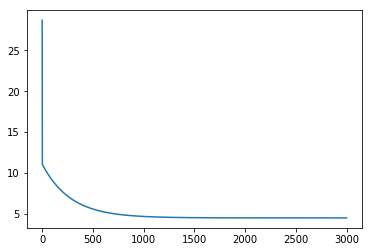

In [111]:
plt.plot(J_history[1:])
plt.savefig('cost_decrease.png', bbox_inches='tight',dpi=300)

#### How theta changes over training iterations
Depending on the intial values, theta should gradually find its way to the optimal values. For some intial values, it may takes many more iterations to reach the optimal Theta values.

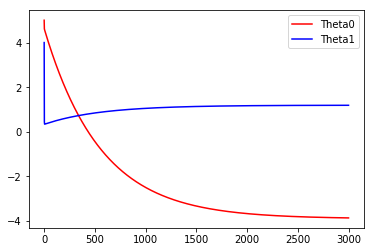

In [110]:
plt.plot(np.array(theta_history)[:,0], c='red', label='Theta0')
plt.plot(np.array(theta_history)[:,1], c='blue', label='Theta1')
plt.legend()
plt.savefig('theta_changes.png', bbox_inches='tight',dpi=300)

#### How the linear model fits the training data?
Visually, it fits the data pretty well. Of course, as expected, you will see some outliers, which is common in any data set. there are always noises and outliers in real life data.

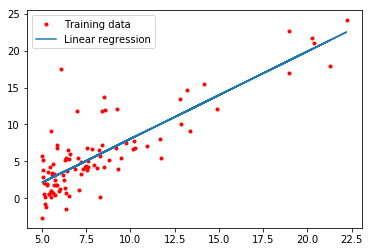

In [109]:
plt.plot(X[:, 1], y, 'r.')
plt.plot(X[:, 1], np.dot(X, theta), '-')
plt.legend(['Training data', 'Linear regression']);
plt.savefig('data_fit.png', bbox_inches='tight',dpi=300)

### Use the model to predict profit based on population of a city
Now, we learned the Theta, and demonstrated it seems a good fit to the training data. Therefore, we could use the learned parameters to make new predictions

In [105]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.dot([1, 3.5], theta)
print('For population = 35,000, we predict a profit of {:.2f}\n'.format(predict1*10000))

predict2 = np.dot([1, 7], theta)
print('For population = 70,000, we predict a profit of {:.2f}\n'.format(predict2*10000))

For population = 35,000, we predict a profit of 3044.96

For population = 70,000, we predict a profit of 44667.41



In [106]:
y[:5]
X[:5]

array([17.592 ,  9.1302, 13.662 , 11.854 ,  6.8233])

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

### 2.4 Visualizing $J(\theta)$ and Gradient Descent

The cost function $J(\theta)$ is bowl-shaped and has a global minimum. The 3D surface plot and contour plot show how the gradient descent works. Through minimizing the cost function $J(\theta)$, the $\theta$ gets updated each iteration of training. The red downward triangles show $\theta$ moving closer toward its optimal values, where the cost function also reaches its golbal minimum. 

This also shows that $\theta$ takes dramatical steps toward its optimal and then takes tiny steps as the gradients become much smaller as it approaches the optimal. 

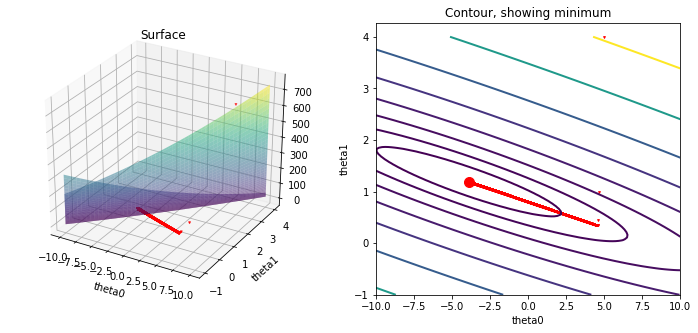

In [107]:
# grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Fill out J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])
        
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.T

# surface plot
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(121, projection='3d')


ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis', alpha=.5)

# plot how theta descent to optimal value, switch theta0 and theta1 to match the surface plot above
_ =ax.scatter(np.array(theta_history)[:,0], np.array(theta_history)[:,1], np.array(J_history), marker='v', c='red', s=3)


_ =plt.xlabel('theta0')
_ =plt.ylabel('theta1')
_ =plt.title('Surface')

# contour plot
# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.subplot(122)
_ =plt.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
# plot how theta descent to optimal value
_ =ax.scatter(np.array(theta_history)[:,0], np.array(theta_history)[:,1],marker='v', c='red', s=3)

_ =plt.xlabel('theta0')
_ =plt.ylabel('theta1')
_ =plt.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
_ =plt.title('Contour, showing minimum')

plt.savefig('gradient_descent_in_working.png', bbox_inches='tight',dpi=300)

### Extra, i would like to try Newton's method to see if indeed it will arrive to theta in just one iteration regardless what initial theta is chosen

 This is Newton's method theta update rule: 
 
 $θ = θ - H^{-1}∇_θJ(θ)$
 $θ^⋆ = (X^T X)^{−1}X^Ty$

In [7]:
X.shape
X[:2]
y.shape
y[:2]

(97, 2)

array([[1.    , 6.1101],
       [1.    , 5.5277]])

(97,)

array([17.592 ,  9.1302])

Theta found by gradient descent: -3.8577, 1.1892
Expected theta values (approximately): [-3.6303, 1.1664]

array([-3.89578088,  1.19303364])